In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
import sys

In [4]:
import jax
from housemaze import env as maze
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image_dict = utils.load_image_dict()

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl


In [6]:
image_keys = image_dict['keys']
groups = [
    # room 1
    [image_keys.index('orange'), image_keys.index('potato')],
    # room 2
    [image_keys.index('lettuce'), image_keys.index('apple')],
    ## room 3
    #[image_keys.index('tomato'), image_keys.index('lettuce')],
]
groups = np.array(groups, dtype=np.int32)
task_objects = groups.reshape(-1)
char2key = mazes.groups_to_char2key(groups)
# char2idx

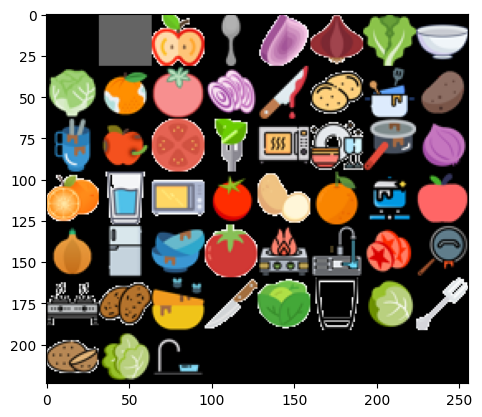

In [7]:
image = renderer.create_image_grid_from_image_tensor(image_dict['images'], max_cols=8)
plt.imshow(image)

# image.shape, image_dict['keys']

In [58]:
def render_maze(maze_str, goal=None, ax=None, include_spawn=False, **kwargs):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(
        *level_init, image_dict,
        spawn_locs=utils.from_str_spawning(maze_str) if include_spawn else None,
        **kwargs
    )
    if ax is None:
        fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(image)
    grid = level_init[0]
    title = f"\n rows={grid.shape[0]}, cols={grid.shape[1]}"
    if goal is not None:
        title += f"Goal = {image_dict['keys'][goal]}"
    ax.set_title(title)
    grid = level_init[0]
    # title = f"\n rows={grid.shape[0]}, cols={grid.shape[1]}"
    # ax.set_title(title)
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])

def render_path(maze_str, goal, ax=None, rng=None, include_spawn=False, **kwargs):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(
        *level_init, image_dict,
        spawn_locs=utils.from_str_spawning(maze_str) if include_spawn else None,
        **kwargs)
    grid = level_init[0]
    path = utils.find_optimal_path(grid, level_init[1], np.array([goal]), rng=rng)
    actions = utils.actions_from_path(path)
    changes = utils.count_action_changes(actions[:-1])

    if ax is None:
        fig, ax = plt.subplots(1, figsize=(5, 5))
    if path is None:
        title = f"NO PATH FOUND"
        ax.imshow(image)
        ax.set_title(title)
        # renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2], ax=ax)
    else:
        title = f"Path length: {len(path)}. Turns: {sum(changes)}"
        # title += f"\n rows={grid.shape[0]}, cols={grid.shape[1]}"
        title += f"\n Goal = {image_dict['keys'][goal]}"
        ax.set_title(title)
        renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2], ax=ax)

# render_maze(mazes.big_m3_maze1)
# render_path(mazes.big_m3_maze1, goal=task_objects[1], include_objects=True, include_spawn=False)

# render_maze(mazes.maze1)
# render_maze(mazes.maze2)
# render_maze(mazes.maze3)
# render_maze(mazes.maze4)

# Practice maze

Version 3


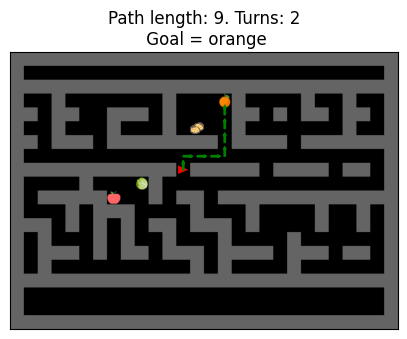

In [9]:
print("Version 3")

render_path(mazes.big_practice_maze, goal=task_objects[0], include_objects=True)

# Manipulation 1: Shortcut

Version 3


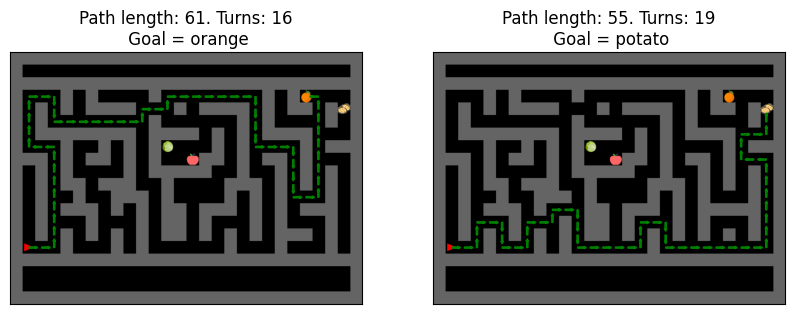

In [10]:
print("Version 3")
m = utils.combine_horizontally(
    utils.cut(utils.reverse(mazes.StandardMaze2, vertical=False, horizontal=False), n=0),
    utils.cut(utils.reverse(mazes.StandardMaze3, vertical=False), n=0))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
render_path(mazes.big_m1_maze3, goal=task_objects[0], ax=axs[0], include_objects=True)


render_path(mazes.big_m1_maze3_shortcut, goal=task_objects[1], ax=axs[1], include_objects=True)


# Manipulation 2: Faster when on-path but further than off-path but closer

VERSION 2


[]

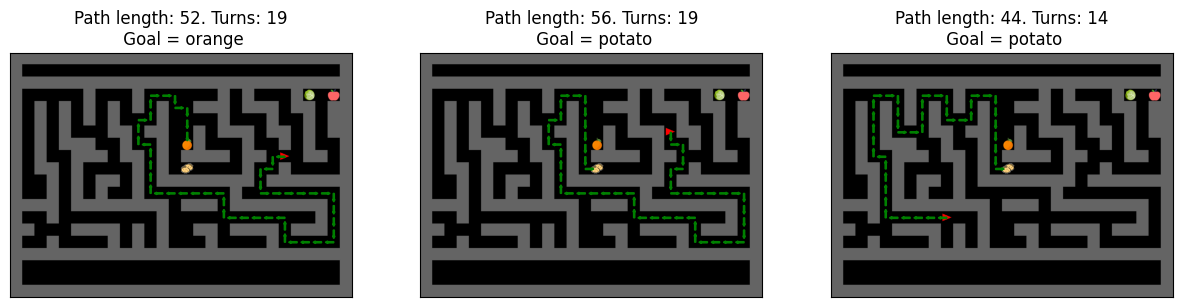

In [11]:
print("VERSION 2")

m = utils.combine_horizontally(
    utils.cut(utils.reverse(mazes.StandardMaze2), n=0),
    utils.cut(utils.reverse(mazes.StandardMaze), n=0))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
render_path(mazes.big_m2_maze2, goal=task_objects[0], ax=axs[0], include_objects=True)

render_path(mazes.big_m2_maze2_onpath, goal=task_objects[1], ax=axs[1], include_objects=True)
render_path(mazes.big_m2_maze2_offpath, goal=task_objects[1], ax=axs[2], include_objects=True)

utils.compare_mazes(mazes.big_m2_maze2, mazes.big_m2_maze2_offpath)
# # offtask = task_objects[1]


# Manipulation 3: Reusing longer of two paths if training path

In [12]:
# print("VERSION 1")
# # version 1
# maze5 = """
# C.#......B...
# .D#.######...
# .##....#.....
# ..####.#.....
# ...#.#.#.###A
# .#.#.#.#...#.
# ##...#.###.##
# ...#...#.#...
# ...#..##.###.
# ##.##.#....#.
# ...#..#.##...
# .######..#E.F
# .>.......#...

# """.strip()

# maze5 = mazes.maze5

# render_path(maze5, goal=task_objects[0])
# render_path(maze5, goal=task_objects[1])


# # # offtask = task_objects[1]


VERSION 2


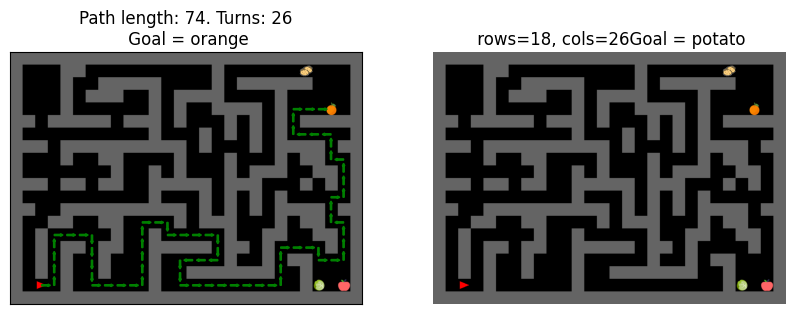

In [13]:
print("VERSION 2")

# m = utils.combine_mazes_horizontally(utils.reverse(mazes.maze3), mazes.maze5)

# m = """
# ...##.........#......B...
# D.C#..####....#.######...
# ...#.###.#.####....#.....
# ...#.....#.#..####.#...A.
# #.#####.##.#...#.#.#.####
# .........#...#.#.#.#.....
# ##.#########.#...#.####.#
# ...#..##...#...#...#.##..
# .......#.#.#...#.###..##.
# ##.##.##.#####.###...#.#.
# .........#...#.#.#.#.....
# #..#########.#.#.#.####.#
# ..##..##...#.###...#.##..
# .#.....#.#.....#..##..##.
# .#.##.##.#####.##.#....#.
# .#>#..#..#.....#..#.##...
# .#.#..#..#..#######..#...
# ...#.....#...........#E.F
# """.strip()
# render_maze(m)
# m = utils.insert(m, 9, '.')
m = """
...##..........#......B...
D.C#..#####....#.#######..
...#.###..#.####....#..#..
...#......#...###.#.#...A.
#.#####.###.#.#.#.#.#.####
..........#.#.#.#.#.#.....
##.##########.#.#.#.####.#
...#..##....#.#.....#.##..
.......#..#.#...#.###..##.
##.##.##..#####.###...#.#.
..........#...#.#.#.#.....
#..##########.#.#.#.####.#
..##..##....#.###...#.##..
.#>....#..#.....#..##..##.
.#.##.##..#####.##.#....#.
.#.#..#...#.....#..#.##...
.#.#..#...#..#######..#...
...#......#...........#E.F
"""

# print(m)
# render_maze(m)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# render_path(m, goal=task_objects[0], ax=axs[0])
# render_path(m, goal=task_objects[1], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
render_path(mazes.big_m3_maze1, goal=task_objects[0], ax=axs[0], include_objects=True, include_spawn=False)
render_maze(mazes.big_m3_maze1, goal=task_objects[1], ax=axs[1])
# render_path(mazes.big_m3_maze1, goal=task_objects[1], ax=axs[1], include_objects=True, include_spawn=False)




# # offtask = task_objects[1]


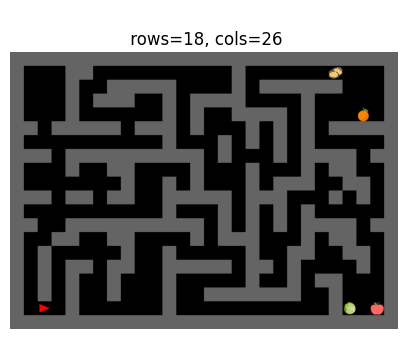

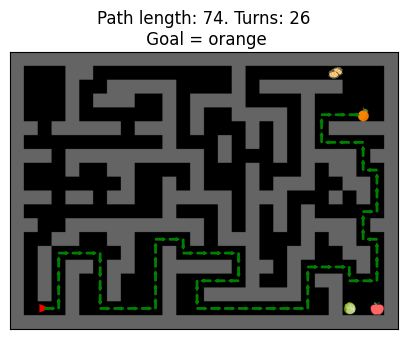

In [14]:
render_maze(mazes.big_m3_maze1)
# render_maze(mazes.big_m3_maze1, True, False)
render_path(mazes.big_m3_maze1, goal=task_objects[0])

# Manipulation 4: probing for planning near goal

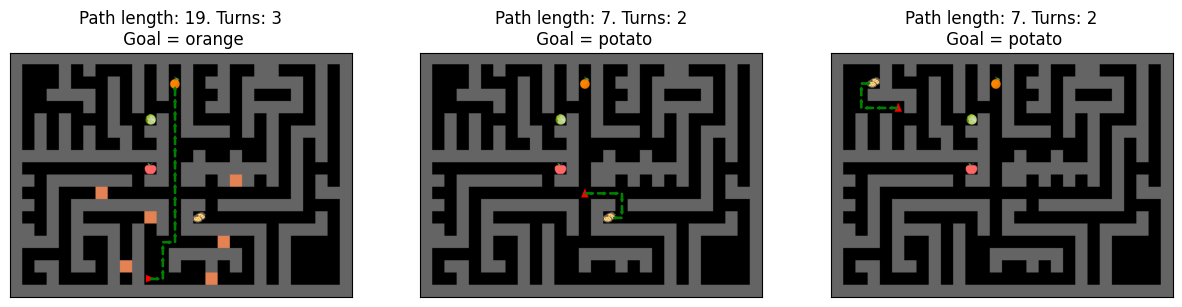

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
render_path(mazes.big_m4_maze_short, goal=task_objects[0], ax=axs[0], include_objects=True, include_spawn=True)

render_path(mazes.big_m4_maze_short_eval_same, goal=task_objects[1], ax=axs[1], include_objects=True)
render_path(mazes.big_m4_maze_short_eval_diff, goal=task_objects[1], ax=axs[2], include_objects=True)

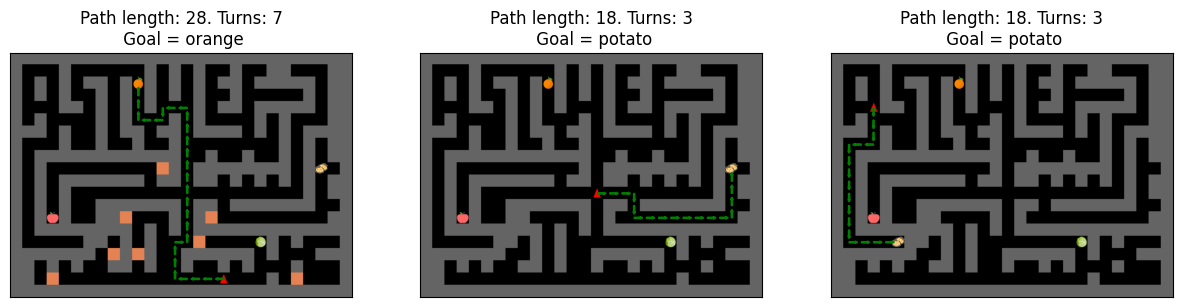

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
render_path(mazes.reverse(mazes.big_m4_maze_long, True, True), goal=task_objects[0], ax=axs[0], include_objects=True, include_spawn=True)

render_path(mazes.reverse(mazes.big_m4_maze_long_eval_same, True, True), goal=task_objects[1], ax=axs[1], include_objects=True)
render_path(mazes.reverse(mazes.big_m4_maze_long_eval_diff, True, True), goal=task_objects[1], ax=axs[2], include_objects=True)

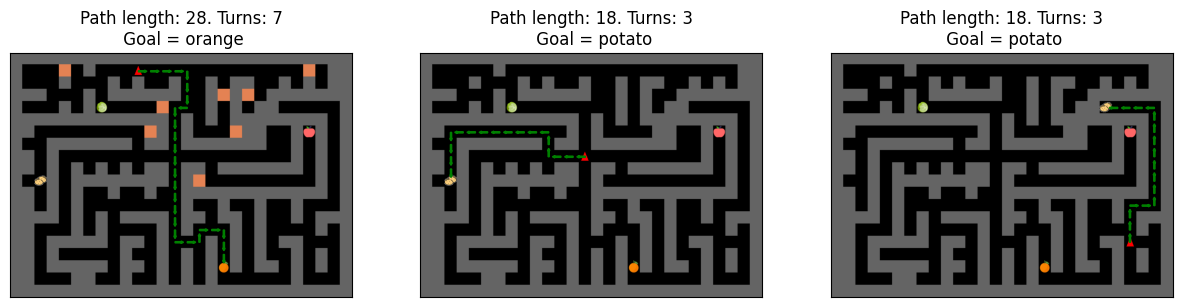

In [102]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
render_path(mazes.big_m4_maze_long, goal=task_objects[0], ax=axs[0], include_objects=True, include_spawn=True)

render_path(mazes.big_m4_maze_long_eval_same, goal=task_objects[1], ax=axs[1], include_objects=True)
render_path(mazes.big_m4_maze_long_eval_diff, goal=task_objects[1], ax=axs[2], include_objects=True)

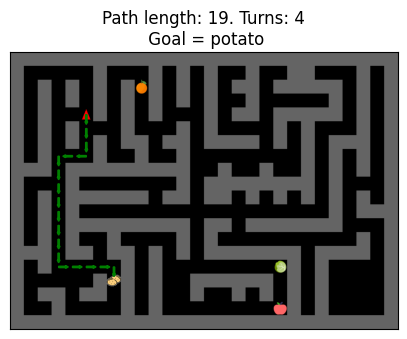

In [34]:
maze = """
.....#...#.#.#..#..##...#.
.#.#.#.#A#.#.#.##.#####.#.
.#.#.#.#.#.#.#..#.....#.#.
.#..^#.#.#...#.##.#####.#.
.#.#...#...#.#....#.#...#.
.#.#.#.##.##.####.#.#.###.
.#...#..#..#........#.#.#.
##.#########..#..#..#.#.#.
...#.......#.########.#...
.#.######.##.##.#.#.#.#.#.
.#.#..................#.##
.#.#########.##.#######...
.#.#..#....#.#..........#.
##.##.##.#.#.#######.####.
.#.....#.#........C#.#....
.....#B#.#..######.#.#....
.##.##.#.#..#..#.#.#.#....
..#....#.#........D#.#....
"""
render_path(maze, goal=task_objects[1])

In [288]:
# rev = partial(mazes.reverse, horizontal=True, vertical=False)


# maze6 = """
# E..#.....#A.B
# ......##.#...
# F..#..#..#.#.
# ####.##.##.##
# ...#.#.....#.
# .#...##......
# .###########.
# ...#......#..
# .#.##.##.##.#
# .#.#..#...###
# ##...####....
# .>.#.##.##...
# ...#.....#C.D
# """.strip()

# maze6_flipped_offtask = """
# E..#.....#A..
# ......##.#...
# F..#..#..#.#.
# ####.##.##.##
# ...#.#.....#.
# .#...##......
# .###########.
# ...#......#B.
# .#.##.##.##.#
# .#.#..#...###
# ##...####....
# .>.#.##.##...
# ...#.....#C.D
# """.strip()



# print("Original map")
# render_path(maze6, goal=task_objects[1])
# render_path(maze6_flipped_offtask, goal=task_objects[1])

# print("train")
# render_path(rev(maze6), goal=task_objects[0])
# print("test 1")
# render_path(rev(maze6), goal=task_objects[1])
# print("test 2")
# render_path(rev(maze6_flipped_offtask), goal=task_objects[1])


# # # # offtask = task_objects[1]


VERSION 2


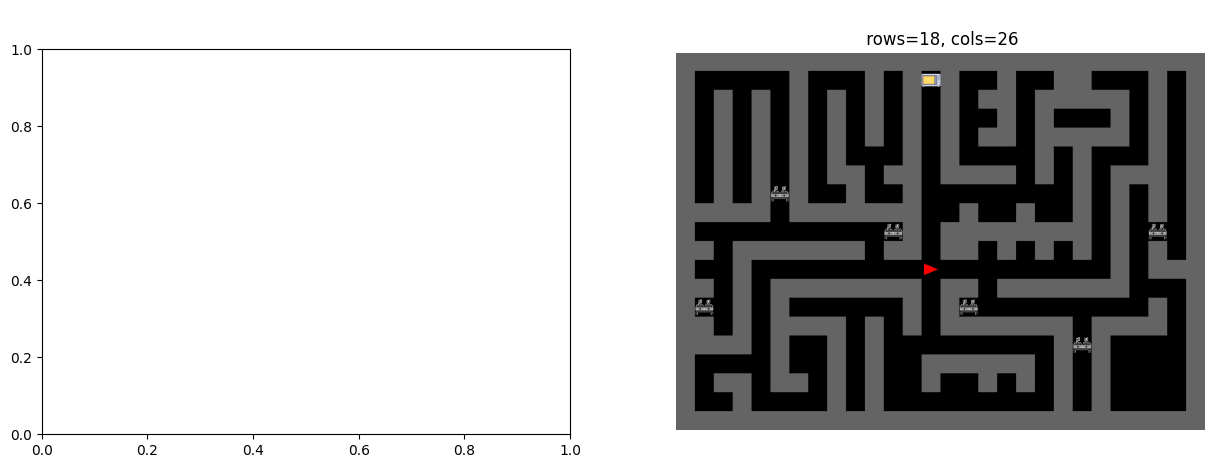

In [137]:
print("VERSION 2")

# m = utils.combine_horizontally(
#     utils.cut(utils.reverse(mazes.StandardMaze2), n=0),
#     utils.cut(utils.reverse(mazes.StandardMaze3), n=0))

# big_m4_maze_all = """
# .....#...#.#A#..#..##...#.
# .#.#.#.#.#.#.#.##.#####.#.
# .#.#.#.#.#.#.#..#.#...#.#.
# .#.#.#.#.#.#.#.##.#####.#.
# .#.#.#.#...#.#....#.#...#.
# .#.#.#.##.##.####.#.#.###.
# .#.#B#..#..#........#.#.#.
# ####.#######..#..#..#.#.#.
# ..........B#.########.#.B.
# #.#######.##.##.#.#.#.#.#.
# ..#.........>.........#.##
# #.#.########.##.#######...
# B.#.#......#.#B.........#.
# #.#.####.#.#.#######.####.
# ###.#..#.#.........#B#....
# ....#..#.#..######.#.#....
# .##.##.#.#..#..#.#.#.#....
# ..#....#.#.........#.#....
# """

# big_m4_maze_short_train = """
# .....#...#.#A#..#..##...#.
# .#.#.#.#.#.#.#.##.#####.#.
# .#.#.#.#.#.#.#..#.#...#.#.
# .#.#.#.#.#.#.#.##.#####.#.
# .#.#.#.#...#.#....#.#...#.
# .#.#.#.##.##.####.#.#.###.
# .#.#B#..#..#........#.#.#.
# ####.#######..#..#..#.#.#.
# ..........B#.########.#.B.
# #.#######.##.##.#.#.#.#.#.
# ..#.........>.........#.##
# #.#.########.##.#######...
# B.#.#......#.#B.........#.
# #.#.####.#.#.#######.####.
# ###.#..#.#.........#B#....
# ....#..#.#..######.#.#....
# .##.##.#.#..#..#.#.#.#....
# ..#....#.#.........#.#....
# """

# # m0 = """
# # .....#...#....#...A##...#.
# # .#.#.#.#.#.#..#.#.#####.#.
# # .#.#.#.#...#..#.#.#B#...#.
# # .#.#.#.##.##..###.#.#.###.
# # .#.###..#..#........#...#.
# # .#..###.##.#.##.###.#.#.#.
# # .##.#....#.#..#..#..#.#.#.
# # ..#.#.##.#.##.##.#.##.#...
# # ..#.#.#..#.....#.#....#.##
# # ###.########.#.#.#.####...
# # ..#>.......#.....#.#....#.
# # #...####.#.#..####.#.####.
# # ..#....#.#.........#.#....
# # """

# # m1 = """
# # .....#...#....#...A##...#.
# # .#.#.#.#.#.#..#.#.#####.#.
# # .#.#.#.#...#..#.#>#B#...#.
# # .#.#.#.##.##..###.#.#.###.
# # .#.###..#..#........#...#.
# # .#..###.##.#.##.###.#.#.#.
# # .##.#....#.#..#..#..#.#.#.
# # ..#.#.##.#.##.##.#.##.#...
# # ..#.#.#..#.....#.#....#.##
# # ###.########.#.#.#.####...
# # ..#........#.....#.#....#.
# # #...####.#.#..####.#.####.
# # ..#....#.#.........#.#....
# # """

# m2 = """
# .....#...#.#A#..#..##...#.
# .#.#.#.#.#.#.#.##.#####.#.
# .#.#.#.#.#.#.#..#.#...#.#.
# .#.#.#.#.#.#.#.##.#####.#.
# .#.#.#.#...#.#....#.#...#.
# .#.#.#.##.##.####.#.#.###.
# .#.#B#..#..#........#.#.#.
# ####.#######..#..#..#.#.#.
# ..........B#.########.#.B.
# #.#######.##.##.#.#.#.#.#.
# ..#.........>.........#.##
# #.#.########.##.#######...
# B.#.#......#.#B.........#.
# #.#.####.#.#.#######.####.
# ###.#..#.#.........#B#....
# ....#..#.#..######.#.#....
# .##.##.#.#..#..#.#.#.#....
# ..#....#.#.........#.#....
# """


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# render_maze(m0, ax=axs[0])
render_maze(m2, ax=axs[1])
# render_maze(m2, ax=axs[2])
# render_path(maze6, goal=task_objects[1], ax=axs[0], include_objects=True, include_spawn=False)
# render_path(maze6_2, goal=task_objects[1], ax=axs[1], include_objects=True, include_spawn=False)